# (Pisa 2012 Test Results Analysis)
## by (Mohammad Ayman)

## Investigation Overview

My goals are to:
1. Show The effect of OECD program for students who thought they're worthy of future careers chances all the way to those who thought they are not. 
2. Showing how much a teacher's support would help in assisting students; using OECD programme policies and development assistance, compared to countries that don't have this assistance.
3. Attempting to answer a question of whether a teacher's support would be of much help for students that have a range of beliefs of maths being too hard to not at all.

## Dataset Overview

> Dataset/ Analytics were taken from PISA Survey Results, PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("pisa_sub.csv")
df.head()

,CNT,OECD,GRADE,TEACHSUP,DISCLIMA,ST29Q05,ST04Q01,ST43Q01,ST43Q02,ST43Q03,...,ST43Q05,ST43Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST44Q05,W_FSTUWT,math_sum
0,Albania,Non-OECD,0.0,1.68,1.85,Agree,Female,Agree,Disagree,Disagree,...,NaN,Disagree,Very much like me,Very much like me,Very much like me,Somewhat like me,Very much like me,Likely,8.9096,1830.9317
1,Albania,Non-OECD,0.0,NaN,NaN,Agree,Female,Strongly agree,Strongly agree,Strongly disagree,...,Agree,Disagree,Not at all like me,Not at all like me,Mostly like me,Somewhat like me,Very much like me,Very Likely,8.9096,2352.8198
2,Albania,Non-OECD,-1.0,NaN,NaN,Strongly agree,Female,Strongly agree,Agree,Strongly agree,...,Strongly agree,Strongly disagree,Not much like me,Not much like me,Very much like me,Very much like me,Somewhat like me,Very Likely,8.4871,2527.6912
3,Albania,Non-OECD,-1.0,1.68,1.80,NaN,Female,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.4871,2247.2738
4,Albania,Non-OECD,-1.0,0.11,-0.08,Strongly agree,Female,Strongly agree,Strongly agree,Disagree,...,Strongly agree,Disagree,NaN,Mostly like me,Very much like me,Very much like me,Very much like me,Likely,8.4871,1927.5199


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

> This Visualization Shows How OECD programme helped students who had high aspirations for future career chances in assisting their ambitions and that shows in how they got higher scores than other, less ambitious students.

In [4]:
agreeing_order = ["Strongly agree", "Agree", "Disagree", "Strongly disagree"]
agreeing_cat = pd.api.types.CategoricalDtype(ordered=True, categories=agreeing_order)
df.ST29Q05 = df.ST29Q05.astype(agreeing_cat)

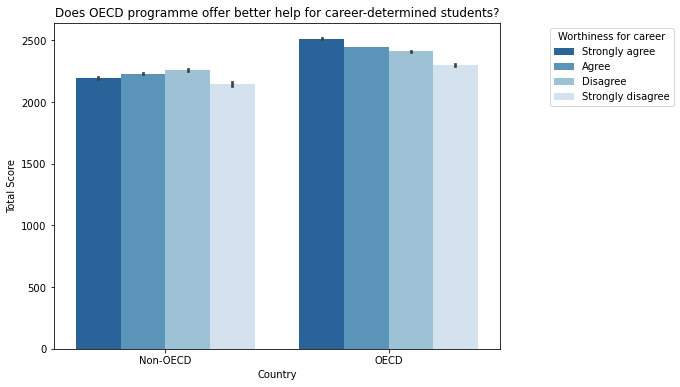

In [7]:
plt.figure(figsize=[8,6])

sb.barplot(data=df, x="OECD", y="math_sum", hue="ST29Q05", palette="Blues_r")
plt.xlabel("Country")
plt.ylabel("Total Score")
plt.legend(title="Worthiness for career", bbox_to_anchor=(1.4, 1))
plt.title("Does OECD programme offer better help for career-determined students?");

## (Visualization 2)

> Next one shows that Teacher's support would help students in countries of OECD programme, and those who aren't.

In [8]:
def mean_poly(x, y, bins = 10, **kwargs):
    """ Custom adapted line plot code. From Lesson 5.6 """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right = False,
                       include_lowest = True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x = bin_centers, y = means, **kwargs)

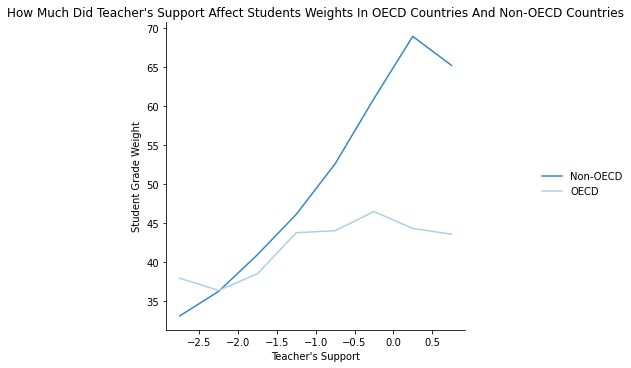

In [12]:
bin_edges = np.arange(-3, df['TEACHSUP'].max()-0.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'OECD', size = 5, palette="Blues_r")
g.map(mean_poly, "TEACHSUP", "W_FSTUWT", bins = bin_edges)
g.set_ylabels('Student Grade Weight')
g.set_xlabels("Teacher's Support")
g.add_legend(title="")
plt.title("How Much Did Teacher's Support Affect Students Weights In OECD Countries And Non-OECD Countries");

## (Visualization 3)

> This one depicts how much teacher's support would help the student overcome his belief that maths is hard, and get in the end better grades.

In [15]:
likelihood_order = ["Very   Likely", "Likely", "Slightly likely", "Not at all likely"]
likelihood_cat = pd.api.types.CategoricalDtype(ordered=True, categories=likelihood_order)
df.ST44Q05 = df.ST44Q05.astype(likelihood_cat)

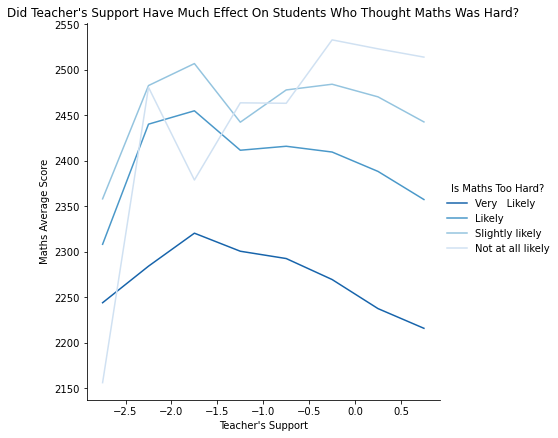

In [17]:
colors = ["#003f5c", "#7a5195", "#ef5675", "#ffa600"]
bin_edges = np.arange(-3, 1.5, 0.5)
g = sb.FacetGrid(data = df, hue = 'ST44Q05', size = 6, palette="Blues_r")
g.map(mean_poly, "TEACHSUP", "math_sum", bins = bin_edges)
g.set_ylabels('Maths Average Score')
g.set_xlabels("Teacher's Support")
g.add_legend(title="Is Maths Too Hard?")
plt.title("Did Teacher's Support Have Much Effect On Students Who Thought Maths Was Hard?");

## (Visualization 4)

> How much could having disciplined climate in class affect students grades, those who see Maths as too hard, and others who don't.

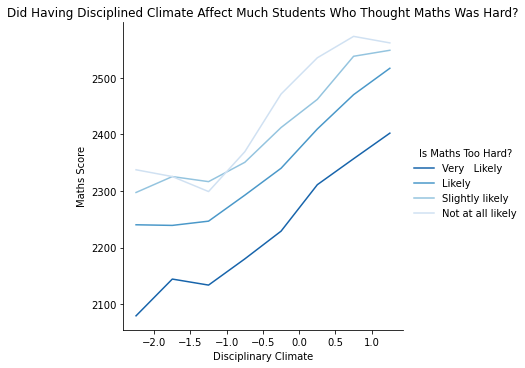

In [18]:
bin_edges = np.arange(-3, 2, .5)
g = sb.FacetGrid(data = df, hue = 'ST44Q05', size = 5, palette="Blues_r")
g.map(mean_poly, "DISCLIMA", "math_sum", bins = bin_edges)
g.set_ylabels('Maths Score')
g.set_xlabels("Disciplinary Climate")
g.add_legend(title="Is Maths Too Hard?")
plt.title("Did Having Disciplined Climate Affect Much Students Who Thought Maths Was Hard?");

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!